In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

# Load IRIS dataset
iris_df = pd.read_csv("iris.csv")

# Prepare features and labels
X_iris = iris_df.drop("species", axis=1)
y_iris = iris_df["species"]

# Encode target labels
label_encoder_iris = LabelEncoder()
y_iris_encoded = label_encoder_iris.fit_transform(y_iris)

# Split into training and testing data
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(
    X_iris, y_iris_encoded, test_size=0.2, random_state=42)

# Train and evaluate Linear SVM
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train_iris, y_train_iris)
y_pred_linear = svm_linear.predict(X_test_iris)

print("Linear Kernel Accuracy:", accuracy_score(y_test_iris, y_pred_linear))
print("Confusion Matrix:\n", confusion_matrix(y_test_iris, y_pred_linear))

# Train and evaluate RBF SVM
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train_iris, y_train_iris)
y_pred_rbf = svm_rbf.predict(X_test_iris)

print("\nRBF Kernel Accuracy:", accuracy_score(y_test_iris, y_pred_rbf))
print("Confusion Matrix:\n", confusion_matrix(y_test_iris, y_pred_rbf))


Linear Kernel Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

RBF Kernel Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


Accuracy: 0.82225
Confusion Matrix:
 [[149   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [ 39 114   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [ 23   0 111   0   0   0   1   0   0   0   0   0   0   0   2   0   0   0
    0   0   0   0   0   0   0   0]
 [ 21   0   0 135   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [ 38   0   0   0 103   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [ 34   0   0   0   0 105   0   0   0   0   0   0   0   0   0   0   0   0
    0   1   0   0   0   0   0   0]
 [ 35   0   0   0   0   0 123   0   0   0   0   0   0   0   0   0   0   2
    0   0   0   0   0   0   0   0]
 [ 91   0   0   2   0   0   0  45   0   0   1   0   0   0   0   0   0   5
    0   0   0   0   0   0   0   0]
 [ 16   0   0   0   0   0   0   0 128   0   0   0   0   0   0   0   0   0
    0   0   0   0

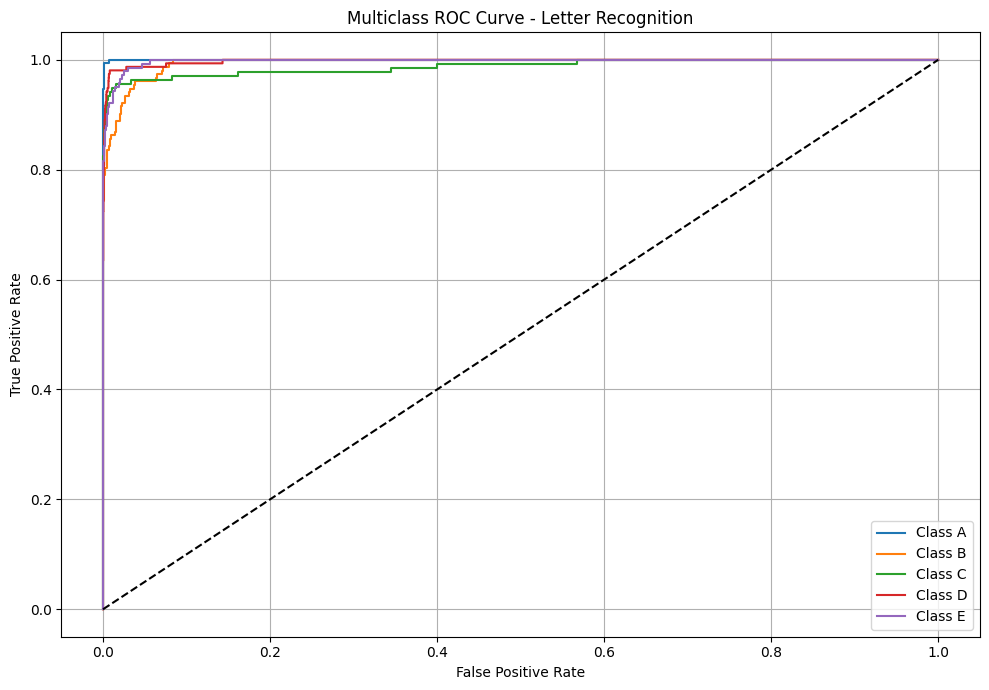

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, label_binarize
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("letter-recognition.csv")

# Assume first column is label, rest are features
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

# Encode labels and binarize for ROC
le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_binarized = label_binarize(y_encoded, classes=range(len(le.classes_)))

# Train-test split
X_train, X_test, y_train, y_test, y_train_bin, y_test_bin = train_test_split(
    X, y_encoded, y_binarized, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SVM with RBF kernel in One-vs-Rest strategy
model = OneVsRestClassifier(SVC(kernel='rbf', probability=True))
model.fit(X_train_scaled, y_train_bin)

# Predictions and probabilities
y_pred_bin = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)

# Evaluation
y_pred_labels = y_pred_bin.argmax(axis=1)
y_test_labels = y_test_bin.argmax(axis=1)

print("Accuracy:", accuracy_score(y_test_labels, y_pred_labels))
print("Confusion Matrix:\n", confusion_matrix(y_test_labels, y_pred_labels))
print("AUC Score:", roc_auc_score(y_test_bin, y_pred_proba, multi_class='ovr'))

# Plot ROC curves for a few classes (to keep plot readable)
plt.figure(figsize=(10, 7))
for i in range(min(5, y_test_bin.shape[1])):  # Plot only first 5 classes
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    plt.plot(fpr, tpr, label=f"Class {le.inverse_transform([i])[0]}")

plt.plot([0, 1], [0, 1], 'k--')
plt.title('Multiclass ROC Curve - Letter Recognition')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
